### Q1) Outlier Detection (20 Marks)

Outlier detection (also known as 'anomaly detection') is the process of finding observation points that deviate from other observations. Such observation points are called outliers or anomalies. In this question, you will employ simple visualization and statistical techniques to find the outliers and then, you will apply outlier detection algorithms.

You will be using forestfires.csv dataset.

<strong>Note: You are required to submit the html files of both Q1 and Q2. Format should be q1_firsname_lastname_rollno.html</strong>

In [200]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans
from sklearn.neighbors import LocalOutlierFactor
from matplotlib import cm


### Loading the dataset

In [201]:
#loading the dataset
data_df = pd.read_csv("forestfires.csv")
data_df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,mar,fri,86.2,26.2,4.3,5.1,8.2,51,6.7,0.0,0.0
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,0.4,0.2,0.0
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [202]:
data = data_df.copy()
data = data.dropna()
data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,564.667311,9.020309,18.842747,44.288201,4.003288,0.021663,63.832012
std,5.520111,64.046482,319.171762,4.562027,6.139730,16.317469,1.806494,0.295959,317.677769
min,18.700000,1.100000,4.300000,0.000000,2.000000,15.000000,0.200000,0.000000,0.000000
25%,90.200000,68.600000,431.600000,6.500000,15.400000,33.000000,2.700000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.200000,42.000000,4.000000,0.000000,0.760000
75%,92.900000,142.400000,714.300000,10.800000,22.800000,53.000000,4.900000,0.000000,7.360000
max,96.200000,291.300000,3601.400000,56.100000,38.100000,100.000000,9.400000,6.400000,4328.400000


### Outlier Visualization

### **Box-Plots**

Plot box-plots for "**FFMC**" 

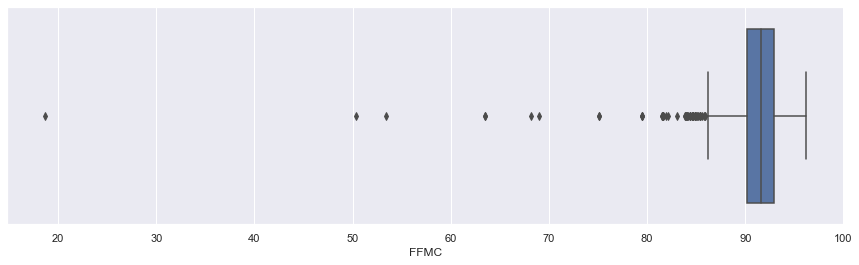

In [203]:
sns.set(rc = {'figure.figsize':(15,4)})
boxplot = sns.boxplot(x = data["FFMC"])

Plot box-plots for "**Day Vs Temp**" and "**Month Vs Temp**" and comment on your results.  

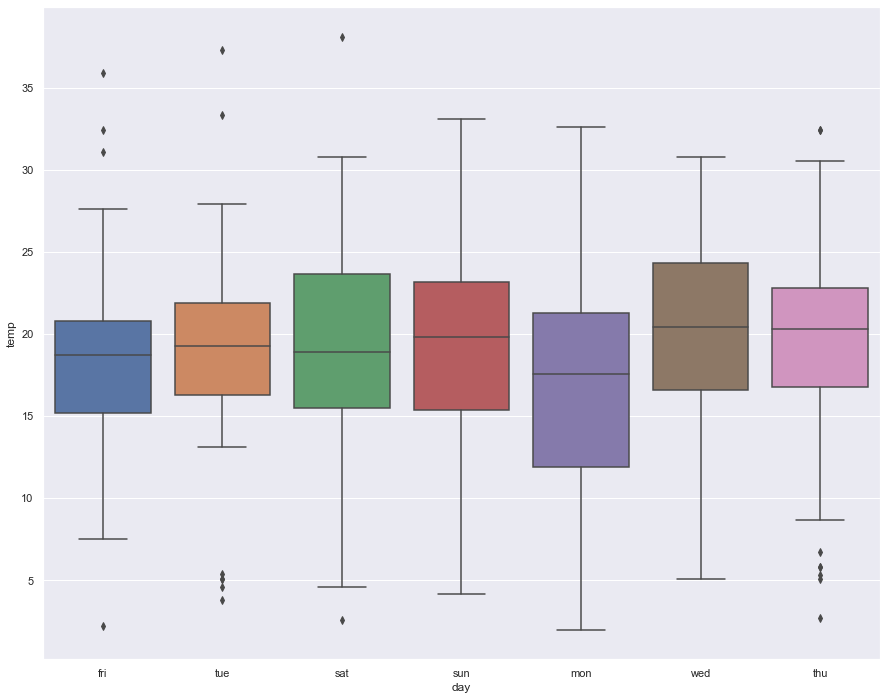

In [204]:
sns.set(rc = {'figure.figsize':(15,12)})
b1 = sns.boxplot(x = "day", y = "temp", data = data)

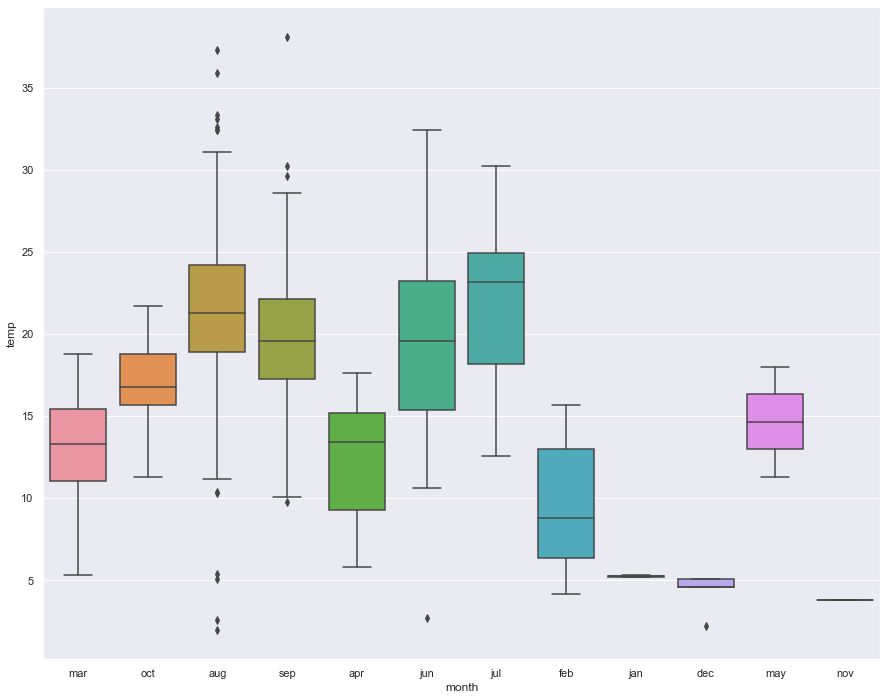

In [205]:
b2 = sns.boxplot(x = "month", y = "temp", data = data)

In the Days vs Temp plot, on all days the majority of temperatures across all days is from 15 - 25 which there being a slight dip by a few degrees on Mondays. However, we can attribute this to randomness as we know there isnt much temperature differences across days in a week. So on a high level we can consider values below 5 and above 32 to be outliers as this is the general trend across days. 
For the Months vs Temp plot, differences are more apparent since temperatures do vary significantly across months. Here to find outliers, we should study each month's boxplot separately as each have very different distributions and spreads.

### **Scatter-plot**

Plot scatter-plot for "**DC Vs Area**". Comment if it shows any outliers. Use matplotlib.pyplot library for scatter-plot.

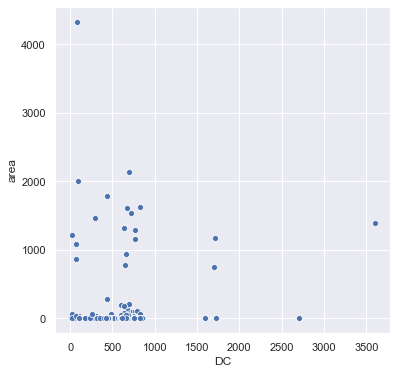

In [206]:
#Write code here
sns.set(rc = {'figure.figsize':(6,6)})
sns.scatterplot(data = data, x = "DC", y = "area")

### Outlier Detection 

### **Standard Deviation**

If certain point is some standard deviation(threshold) away from the mean it can be identified as outlier. For **Area and Temp**, output the list of values that are identified as outliers using optimal value of threshold.

In [207]:
from numpy import mean, median
from numpy import std
from numpy import percentile
area_std = std(data['area'])
area_mean = mean(data['area'])
temp_std = std(data['temp'])
temp_mean = mean(data['temp'])

area_threshold = area_std * 3
area_lower, area_upper = area_mean - area_threshold, area_mean + area_threshold

temp_threshold = temp_std * 3
temp_lower, temp_upper = temp_mean - temp_threshold, temp_mean + temp_threshold

area_outliers = [i for i in data['area'] if i < area_lower or i > area_upper]
temp_outliers = [i for i in data['temp'] if i < temp_lower or i > temp_upper]

print("Area mean:", area_mean)
print("Area outliers")
print(area_outliers)

print("Temp mean:", temp_mean)
print("Temp outliers")
print(temp_outliers)

Area mean: 63.83201160541585
Area outliers
[1314.0, 4328.4, 1392.4, 2000.0, 1609.4, 2137.0, 1090.84, 1224.24, 1786.45, 1463.52, 1545.18, 1622.18, 1156.04, 1290.03, 1174.63]
Temp mean: 18.842746615087037
Temp outliers
[38.1, 37.3]


* **What standard deviation threshold did you use to detect the outliers and why?**

I used a standard deviation threshold of 3 which would cover 99.7% which results in a decent number of outliers for both columns. I initially thought of using a threshold of 2 which would cover 95% of the data from mean since our dataset is reasonably small with only 517 rows, but this resulted in temperature outliers jumping from 2 to 35 and this would remove a valid set of values. 

### ***IQR***

For **Area and Temp**, output the list of values that are identified as outliers on the basis of their IQR values.

For this, calculate the first (q1) and third quartile (q3). An outlier is then a data point  that lies outside the interquartile range. That is:
*   *Lower outlier= Q1 - (k x IQR)*
*   *Higher outlier= Q3 + (k x IQR)*

Choose an appropriate 'k' for this part.

In [208]:
k = 6

area_q1, area_q3 = percentile(data['area'], 25), percentile(data['area'], 75)
area_iqr = area_q3 - area_q1
area_threshold = area_iqr * k
area_lower, area_upper = area_q1 - area_threshold, area_q3 + area_threshold
area_outliers = [x for x in data['area'] if x < area_lower or x > area_upper]
print("IQR:", area_iqr)
print("Q1:", area_q1)
print("Q2:", median(data['area']))
print("Q3:", area_q3)
print("Area mean:", area_mean)
print("Area std:", area_std)
print("Area outliers")
# print(len(area_outliers))
print(area_outliers)

k = 1.5
temp_q1, temp_q3 = percentile(data['temp'], 25), percentile(data['temp'], 75)
temp_iqr = temp_q3 - temp_q1
temp_threshold = temp_iqr * k
temp_lower, temp_upper = temp_q1 - temp_threshold, temp_q3 + temp_threshold
temp_outliers = [x for x in data['temp'] if x < temp_lower or x > temp_upper]
print("Temp mean:", temp_mean)
print('IQR:', temp_iqr)
print("Q1:", temp_q1)
print("Q2:", median(data['temp']))
print("Q3:", temp_q3)
print("Temp std:", temp_std)
print("Temp outliers")
print(temp_outliers)

IQR: 7.36
Q1: 0.0
Q2: 0.76
Q3: 7.36
Area mean: 63.83201160541585
Area std: 317.3703883559983
Area outliers
[1314.0, 942.4, 4328.4, 1392.4, 779.5, 866.0, 2000.0, 1609.4, 2137.0, 58.3, 64.1, 71.3, 88.49, 95.18, 103.39, 105.66, 154.88, 196.48, 200.94, 212.88, 1090.84, 1224.24, 1786.45, 1463.52, 1545.18, 1622.18, 111.22, 1156.04, 1290.03, 1174.63, 70.76, 51.78, 746.28, 185.76, 82.75, 61.13, 70.32, 278.53, 54.29]
Temp mean: 18.842746615087037
IQR: 7.4
Q1: 15.4
Q2: 19.2
Q3: 22.8
Temp std: 6.13378967863067
Temp outliers
[2.0, 38.1, 2.2, 4.2, 2.7, 37.3, 35.9, 2.6, 3.8]


* **What k-value did you use to detect the outliers and why?**

Although the standard k-value is 1.5, I played around with different values to see what the results were. 1.5 worked well for temperature as it has a low spread (standard deviation of 6.13). Area however has a highly skewed distribution with around half the values being 0 but some are really high so has a high spread (standard deviation of 317.37). Using k = 1.5 here identified any value about 20 and above to be an outlier so to remedy this I increased the k to 6 which then identified any value about 50 or up as an outlier. 

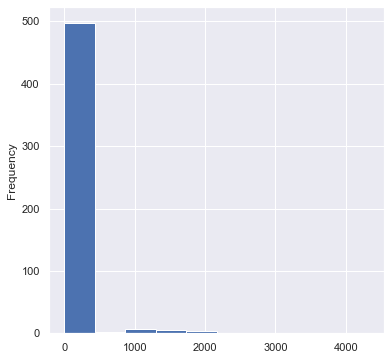

In [209]:
# Some data exploration to study overall distributions

data['area'].plot.hist()

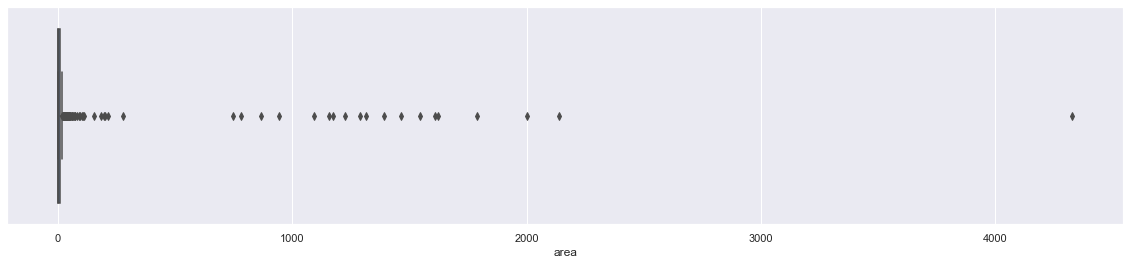

In [210]:
sns.set(rc = {'figure.figsize':(20,4)})
boxplot = sns.boxplot(x = data["area"])

In [211]:
data.groupby('area').count()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
area,,,,,,,,,,
0.00,238,238,238,238,238,238,238,238,238,238
0.09,1,1,1,1,1,1,1,1,1,1
0.17,1,1,1,1,1,1,1,1,1,1
0.21,1,1,1,1,1,1,1,1,1,1
0.24,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
1622.18,1,1,1,1,1,1,1,1,1,1
1786.45,1,1,1,1,1,1,1,1,1,1
2000.00,1,1,1,1,1,1,1,1,1,1


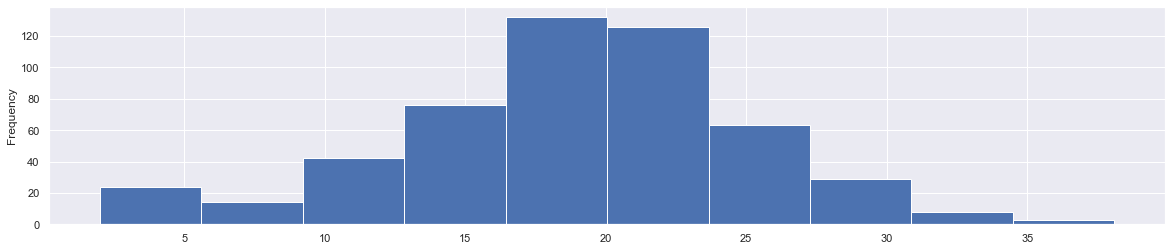

In [212]:
data['temp'].plot.hist()

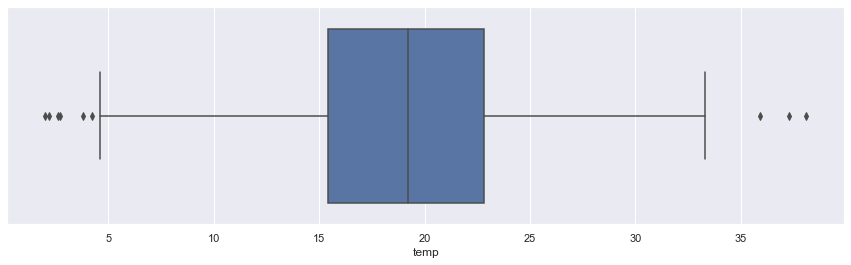

In [213]:
sns.set(rc = {'figure.figsize':(15,4)})
boxplot = sns.boxplot(x = data["temp"])

* **Which parameter (IQR or standard deviation) is better outlier detection? Give reason.**

To understand this, I studied the temp and area columns in more detail. The temperature column has a symmetric normal distribution so both outlier detection techniques worked well on it but since standard deviation method is design for normal distributions, I'd say that would be a better method. The area column on the otherhand had a highly skewed distribution with 238/517 of the values being 0. The standard deviation method gave more reasonable results for this so only really high values were removed. To achieve the similar results with IQR, I had to keep a high k-value. In short, our results showed standard deviation to be better but this generally depends on underlying distribution.

### **Outlier Detection using LOC (Local Outlier Factor)**

LOF uses density-based outlier detection to identify local outliers. An anomaly score is assigned to each sample which measures the local deviation of density of a this sample with respect to its neighbors. 

In [214]:
#Removing month and day colums
data = data.drop('month', axis = 1)
data = data.drop('day', axis = 1)

**1.** Tranform the features by scaling them to a 
given range(e.g. 0-1):

In [215]:
from sklearn.preprocessing import MinMaxScaler
#Write your code here for minmax scaling
scaler = MinMaxScaler()
scaler.fit(data)
scaled = scaler.transform(data)

**2.** Implement LOC algorithm using sklearn. Choose the parameters that will be passed into the function:

In [216]:
#write your code here
lof = LocalOutlierFactor(n_neighbors = 10)
y_pred = lof.fit_predict(scaled)
lof_outliers = data.iloc[y_pred == -1]
print(lof_outliers)

     FFMC    DMC      DC   ISI  temp   RH  wind  rain     area
1    90.6   35.4   669.1   6.7  18.0   33   0.9   0.0     0.00
3    91.7   33.3    77.5   9.0   8.3   97   0.4   0.2     0.00
7    91.5  145.4   608.2  10.7   2.0   86   2.2   0.0     0.00
12   63.5   70.8   665.3   0.1  17.0   72   6.7   0.0     0.00
21   91.8   78.5  1724.3   9.2  19.1   38   2.7   0.0     0.00
22   94.3   96.3   200.0  56.1  21.0   44   4.5   0.0     0.00
50   92.9  137.0   706.4   9.2  20.8   17   1.3   0.0     0.00
81   90.2   99.6   631.2   6.3  17.9   44   2.2   0.0  1314.00
84   91.7  114.3   661.3   6.3  20.2   45   3.6   0.0   942.40
85   92.9  137.0  2706.4   9.2  21.5   15   0.9   0.0     0.00
91   91.7   35.8    80.8   7.8  17.4   24   5.4   0.0  4328.40
97   69.0    2.4    15.5   0.7  17.4   24   5.4   0.0     0.00
98   91.4  142.4  3601.4  10.6  11.6   87   4.5   0.0  1392.40
102  94.8  108.3   647.1  17.0  20.1   40   4.0   0.0   779.50
113  91.8   78.5  1724.3   9.2  18.9   35   2.7   0.0  

C:\Users\Zohair\Anaconda3\lib\site-packages\sklearn\neighbors\lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


* **What value did you use for the 'n_neighbours'?**

I used a value of 10. I played around with other values and even removed the n_neighbours parameter but results didn't change and the number of outliers were always 52.

**3.** Print the length of outliers returned.

In [217]:
print(len(lof_outliers))

52


### **Isolation Forest**

Isolation Forest is an outlier detection algoritm that is based on the Decision Trees. It spearates the outliers by randomly selecting a certain attribute and then randomly selecting a split value between the max and min values of this feature.

**1.** Implement Isolation Forest algorithm using sklearn. Choose the parameters that will be passed into the function:

In [220]:
#Write your code here
from sklearn.ensemble import IsolationForest
iso_f = IsolationForest(n_estimators = 10, max_samples = 25)
iso_f.fit(data)
y_pred = iso_f.predict(data)
iso_f_outliers = data.iloc[y_pred==-1]
print(iso_f_outliers)

     FFMC    DMC      DC   ISI  temp   RH  wind  rain     area
30   94.3   85.1   692.3  15.9  25.4   24   3.6   0.0     0.00
40   79.5   60.6   366.7   1.5  23.3   37   3.1   0.0     0.00
45   94.3   85.1   692.3  15.9  25.9   24   4.0   0.0     0.00
81   90.2   99.6   631.2   6.3  17.9   44   2.2   0.0  1314.00
91   91.7   35.8    80.8   7.8  17.4   24   5.4   0.0  4328.40
97   69.0    2.4    15.5   0.7  17.4   24   5.4   0.0     0.00
98   91.4  142.4  3601.4  10.6  11.6   87   4.5   0.0  1392.40
106  91.4   30.7    74.3   7.5  18.2   29   3.1   0.0   866.00
118  90.1   39.7    86.6   6.2  10.6   30   4.0   0.0  2000.00
123  84.4   73.4   671.9   3.2  17.9   45   3.1   0.0  1609.40
125  92.6   46.5   691.8   8.8  20.6   24   5.4   0.0     0.00
129  92.6   46.5   691.8   8.8  15.4   35   0.9   0.0  2137.00
196  81.5    9.1    55.2   2.7   5.8   54   5.8   0.0    10.93
202  83.9    8.7    32.1   2.1   8.8   68   2.2   0.0    13.05
211  93.5  139.4   594.2  20.3   5.1   96   5.8   0.0  

C:\Users\Zohair\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
C:\Users\Zohair\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\Users\Zohair\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


* **What value did you use for the 'max_samples'?**

I chose max samples to be 25 as that seemed a reasonable number for a dataframe with 517 rows

**2.** Print the length of outliers returned.

In [221]:
print(len(iso_f_outliers))

52


* **Compare the results from both LOC and Isolation Forest:** 

Both techniques returned the same number of outliers (52) for reasonable parameters, although visually these outliers seem to be different when results were printed